File Name : Iris.csv
File Directory : C:/Users/sivas/Desktop/GL/DataSet

-------------------------------------------------Dataset has following shape------------------------------------------------
Rows : 150
Columns : 6

--------------------------------------------Dataset contains following DataTypes--------------------------------------------
int64 : 1
float64 : 4
object : 1

Please Specify the Target Column

Species
It is a Classification Problem



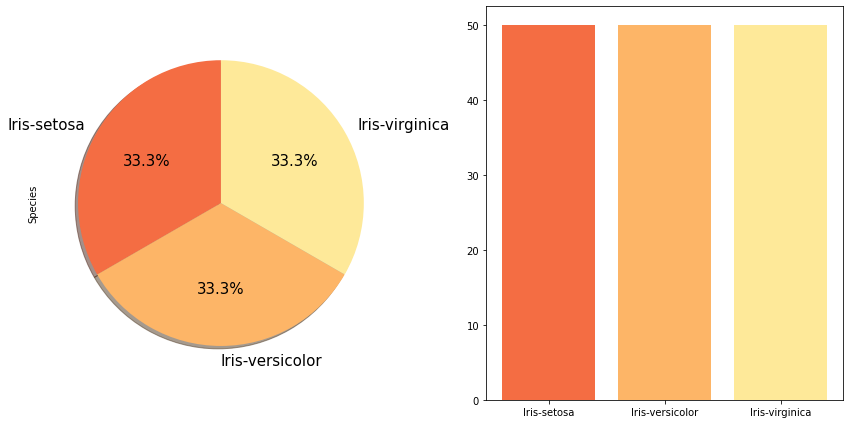

Select below options

1.Univariate Analysis
2.Bivariate Analysis
3.Multivariate Analysis
4.Missing Value Analysis
5.Quit

2

Currently only Density Plot is available for Classification Problem

Total Features 4
No.of Features to Visualize

2


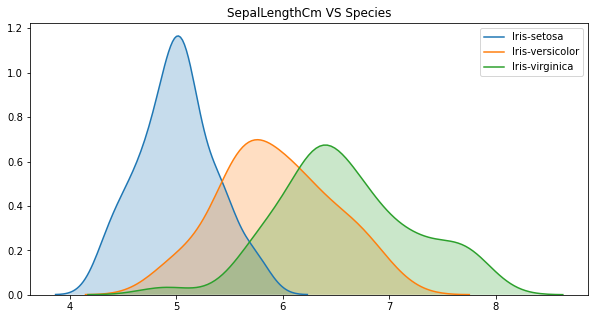

SepalLengthCmis a good predictor.


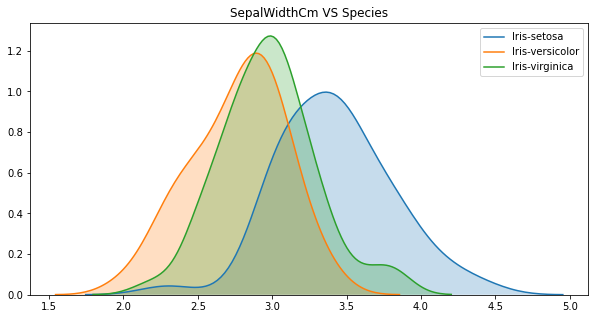

SepalWidthCm is a Weak predictor.
Select below options

1.Univariate Analysis
2.Bivariate Analysis
3.Multivariate Analysis
4.Missing Value Analysis
5.Quit

5

Thank You, Bye.



In [409]:
import sys
import time

import warnings
warnings.filterwarnings("ignore")

# !pip install missingno
import missingno as msno

# !pip install tabulate
from tabulate import tabulate

import numpy as np
import pandas as pd

import plotly.express as px

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from tkinter import *
from tkinter.filedialog import askopenfilename   

RED = '\033[91m'
BOLD = '\033[1m'
UNDERLINE = '\033[4m'
END = '\033[0m'
PURPLE = '\033[31m'
DARKCYAN = '\033[36m'
GREEN = '\033[92m'
Magenta = '\033[95m'
Grey = '\033[90m'
CYAN = '\033[96m'
Magenta_ = '\033[35m'

fname = []
# global dt_int,dt_float,dt_object
dt_int = dt_float = dt_object = []
val = 1

def missing_Table():
    percent_missing = data.isnull().sum() * 100 / len(data)
    missing_value_df = pd.DataFrame({'Count': data.isnull().sum(),
                                     'Percentage': percent_missing}).sort_values('Percentage',ascending=False)[:15]
#     print(f'\n{BOLD}{GREEN}Top 15 Missing Columns:')
    print(f"{BOLD}{GREEN}Top 15 Missing Columns{END}".center(137, "-"))
#     print(f'-'*22)
    pdtabulate=lambda df:tabulate(missing_value_df,headers=['Features','Count','Percentage'],tablefmt='psql',stralign='center')
    print(f'{BOLD}{GREEN}{pdtabulate(missing_value_df)}{END}\n')
#     print(f'{missing_value_df}{END}\n')
    
def missing_Bar():
    msno.bar(data)
    plt.show()
    
def missing_Matrix():    
    msno.matrix(data)
    plt.show()
    
def missing_Analysis():
    input_value12 = int(input('Select below options\n\n1.Missing Table\n2.Missing Bar\n3.Missing Matrix\n\n'))
    if input_value12 == 1:
        missing_Table()
    elif input_value12 == 2:
        missing_Bar()
    elif input_value12 == 3:
        missing_Matrix()
    else :
        print(f'{BOLD}{RED}ERROR{END} : Please enter in range value')
    
def multivariate():
    input_value1 = int(input('Select below options\n\n1.Correlation Matrix\n2.List of Correlated Features\n\n'))
    if input_value1 == 1:
        correlation_Matrix()
    elif input_value1 == 2:
        thresh = float(input('Enter the threshold '))
        correlation(data,thresh)
    else :
        print(f'{BOLD}{RED}ERROR{END} : Please enter in range value')
                                
def bivariate():
    if val == 1:
#         input_value1 = int(input('Select below options\n\n1.Density Plot\n2.Scatter Plot\n\n'))
#         if input_value1 == 1:
        print('\nCurrently only Density Plot is available for Classification Problem\n')
        no_of_Features(density_Plot_Cat)
#         elif input_value1 == 2:
#             no_of_Features(scatter_Plot)
#         else :
#             print(f'{BOLD}{RED}ERROR{END} : Please enter in range value')
    else:
        print('\nCurrently only Scatter Plot is available for Regression Problem\n')
        no_of_Features(scatter_Plot)
        
def univariate():
    input_value1 = int(input('Select below options\n\n1.Box Plot\n2.Histogram\n3.Distribution\n\n'))
    if input_value1 == 1:
        no_of_Features(box_Plot)
    elif input_value1 == 2:
        no_of_Features(histogram)
    elif input_value1 == 3:
        no_of_Features(distribution)
    else :
        print(f'{BOLD}{RED}ERROR{END} : Please enter in range value')
                                
def check_Problem(tar_col):
    if (data[tar_col].nunique() / len(data[tar_col])) <= 0.05 : 
        if data[tar_col].dtypes == 'O':
            print('It is a Classification Problem\n')
            tar_Viz(tar_col)
        else:
            print(f'\nLooks like a Classification Problem but Datatype is {BOLD}{RED}{data[tar_col].dtypes}{END} ,Hmmm....lemme change the Datatype to Object\n')
            data[tar_col] = data[tar_col].astype('category')
            tar_Viz(tar_col)
    else:
        print('\nRegression Problem\n')
        global val
        val = 0

# def data_Imbalance(lst,tar_col):
#     if len(set(lst)) != 1:
#         print(f"Target Column '{tar_col}' has Imbalanced Data\n")
#         print("NOTE:Refer following link to handle Imbalanced Data https://imbalanced-learn.readthedocs.io/en/stable/over_sampling.html")

def tar_Viz(tar_col):
    count = data[tar_col].value_counts()
    
#     fig = px.pie(values=count, names=count.index, title='Target Column Classes Distribution')
#     fig.update_traces(textposition='inside', textinfo='percent+label')
#     fig.show()

#     fig = px.bar(data, x=count.index, y=count)
#     fig.update_traces(textposition='inside')
#     fig.show()
    cmap = plt.get_cmap('Spectral')
    colors = [cmap(i) for i in np.linspace(0.2, 1, 8)]

    f, (ax1, ax2) = plt.subplots(1,2,figsize=(12,6))
    count.plot(kind='pie', ax=ax1,startangle=90,autopct='%.1f%%',shadow=True, labels=count.index,colors=colors,fontsize=15)
    plt.bar(x = count.index, height=count, color=colors)
    plt.tight_layout()
    plt.show()
    
    tar_val =list(data[tar_col].value_counts().values)
    if len(set(tar_val)) != 1:
        print(f"Target Column '{tar_col}' has Imbalanced Data\n")
        print("NOTE:Refer following link to handle Imbalanced Data https://imbalanced-learn.readthedocs.io/en/stable/over_sampling.html")
    time.sleep(0.2)
#     data_Imbalance(tar_val,tar_col)
    
def df_Info(data):
#     print(f'{BOLD}{Magenta}Your Dataset has following shape')
    print(f"{BOLD}{Magenta}Dataset has following shape{END}".center(137, "-"))
#     print('*'*32)
    print(f'{BOLD}{Magenta}Rows : {data.shape[0]}\nColumns : {data.shape[1]}\n{END}')
    
def df_Dtypes(data):
    
    global dt_int,dt_float,dt_object
#     dt_int = dt_float = dt_object = []
    g = data.columns.to_series().groupby(data.dtypes).groups
#     print(f'{BOLD}{Grey}Your Dataset contains following DataTypes')
    print(f"{BOLD}{Grey}Dataset contains following DataTypes{END}".center(137, "-"))
#     print('*'*41)
    for k, v in g.items():
        print(f"{BOLD}{Grey}{k.name} : {len(v)}")
    print(f'{END}')      
    for k, v in g.items():
#     print(f"{k.name} : {(v)}")
        if k.name == 'int64':
            dt_int = list(v)

        elif k.name == 'float64':
            dt_float = list(v)

        elif k.name == 'object':
            dt_object = list(v)
        time.sleep(0.01)

def no_of_Features(func):
    print(f'Total Features {len(dt_float)}')
    No_of_Feat = int(input('No.of Features to Visualize\n\n'))
    if No_of_Feat <= len(dt_float) :
        func(no_of_col = No_of_Feat)
    else :
        print(f'{BOLD}{RED}ERROR{END} : No.of columns should be <= {len(dt_float)}')

def correlation(dataset,threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (abs(corr_matrix.iloc[i, j]) >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
    print(f"\nBelow {len(col_corr)} are/is highly correlated features\n\n",col_corr)
    
def correlation_Matrix():
    plt.figure(figsize=(20,15))
    matrix = np.triu(data[dt_float + dt_int].corr())
    sns.heatmap(data[dt_float + dt_int].corr(),annot=True, fmt=".2f",cmap="YlGnBu",mask=matrix)
    plt.show()

def scatter_Plot(no_of_col = len(dt_float)):
    for col in dt_float[:no_of_col]:
        plt.figure(figsize=(10,5))
        sns.scatterplot(x=tar_col, y=col, data=data)
#         plt.title(f"{col} VS {tar_col}")
        plt.show()
        
        cor = data[col].corr(data[tar_col])
        print(f'Correlation between {col} and {tar_col} is {cor}\n')
        print('*'*85)

def density_obser(col):
#     coll = dt_float + dt_int #data.columns[1:-1]
#     for i, col in enumerate(coll): 
    df = data[[tar_col,col]].groupby([tar_col]).agg({col:['min', 'max']})
    df.columns = df.columns.droplevel()

    flag = False
    for i in range(1,len(df.T.min().index)):
        max_val = df.T.max().sort_values()[i-1]
        min_val = df.T.min().sort_values()[i]
        if max_val <= min_val:
            flag = True
    if flag:
        print(f"{col} is a Very good predictor.")
    else:
        min_ = df.T.min().sort_values()[1] - df.T.min().sort_values()[0]
        pred_min = min_/(df.loc[df.T.min().idxmin()][1] - df.loc[df.T.min().idxmin()][0])

        max_ = df.T.max().sort_values(ascending=False)[0] - df.T.max().sort_values(ascending=False)[1]
        pred_max = max_ / (df.loc[df.T.max().idxmax()][1] - df.loc[df.T.max().idxmax()][0])

        if pred_min >= 0.4 or pred_max >= 0.4: 
            print(f"{col} is a good predictor.")
        elif 0.4 > pred_min > 0.2 or 0.4 > pred_max > 0.2: 
            print(f"{col} is a Weak predictor.")
        else :
            print(f"{col} is a poor predictor.")

def density_Plot_Cat(no_of_col = len(dt_float)):
    coll = dt_float + dt_int #data.columns[1:-1]
    for i, col in enumerate(coll[:no_of_col]):
#     for i, col in enumerate(dt_float[:no_of_col]):
        plt.figure(figsize=(10,5))
        for i in list(data[tar_col].unique()):
            sns.kdeplot(data.loc[data[tar_col] == i, col], shade=True, label=i)
        plt.title(f"{col} VS {tar_col}")
        plt.show()
        density_obser(col)
    
def outlier_Treatment(data,col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    outliers = data[(data[col] < lower_range) | (data[col] > upper_range)]
    print(f"Column '{col}' has {len(outliers)} outliers\n\n")

def skewness_(df,col):
    skewness = df[col].skew()
    if skewness > 0:
        print('Distribution is Right Skewed\n')
    elif skewness < 0:
        print('Distribution is Left Skewed\n')
    else:
        print('Normally Distributed\n')
        
def box_Plot(no_of_col = len(dt_float)):
    for col in dt_float[:no_of_col]:
        plt.figure(figsize=(10,5))
        sns.boxplot(x=data[col],color=(np.random.uniform(0, 1), np.random.uniform(0, 1), np.random.uniform(0, 1)));
        plt.show()
        
        skewness_(data,col)
        outlier_Treatment(data,col)
#         if len(outliers) != 0:
#             print(f"Index of outlier records : {list(outliers.index)}")
        print('*'*85,'\n')
    
def histogram(no_of_col = len(dt_float)):
    for col in dt_float[:no_of_col]:
        plt.figure(figsize=(10,5))
        sns.distplot(data[col],kde = False,hist_kws={"linewidth": 3,"alpha": 1}
                     ,color=(np.random.uniform(0, 1), np.random.uniform(0, 1), np.random.uniform(0, 1)));
        plt.show()
        skewness_(data,col)
#         outlier_Treatment(data,col)
        print('*'*85)        
        
        
def distribution(no_of_col = len(dt_float)):
    for col in dt_float[:no_of_col]:
        plt.figure(figsize=(10,5))
        sns.kdeplot(data[col], shade=True,color=(np.random.uniform(0, 1), np.random.uniform(0, 1), np.random.uniform(0, 1)));
#         sns.kdeplot(data[col], shade=True,color=np.random.rand(3,));
        plt.show()
        
        skewness_(data,col)
#         outlier_Treatment(data,col)
        print('*'*85)            
            
def openFile():
    global fname
    fname = askopenfilename()
    root.destroy()

if __name__ == '__main__':

    root = Tk()
    Button(root, text='File Open', command = openFile).pack(fill=X)
    mainloop()

    if fname == []:
        print("No FIle has selected")
    else:
        file_path = fname.rsplit('/',maxsplit=1)
        df = file_path[1]
        print(f"{BOLD}File Name : {CYAN}{df}{END}")
        print(f"{BOLD}File Directory : {CYAN}{file_path[0]}{END}\n")
        try:
            data = pd.read_csv(fname)
            df_Info(data)
            df_Dtypes(data)
            try :
                tar_col = input('Please Specify the Target Column\n\n')
                #checking for type of problem(classification/regression)
                check_Problem(tar_col)                
                while True:    
                    try :
                        input_value = int(input(f'Select below options\n\n{BOLD}{PURPLE}1.Univariate Analysis{END}\n2.{BOLD}{DARKCYAN}Bivariate Analysis{END}\n3.{BOLD}{Magenta_}Multivariate Analysis{END}\n4.{BOLD}Missing Value Analysis{END}\n5.Quit\n\n'))
                        if input_value == 1:
                            univariate()
                        elif input_value == 2:
                            bivariate()
                        elif input_value == 3:
                            multivariate()
                        elif input_value == 4:
                            missing_Analysis()
                        elif input_value == 5 :
                            print(f'\n{BOLD}{GREEN}Thank You, Bye.{END}\n')
                            break
                        else:
                            print(f'{BOLD}{RED}ERROR{END} : Please enter in range value')
                    except ValueError :
                        print(f'{BOLD}{RED}ERROR{END} : only INTEGERS are acceptable')
            except KeyError:
                print(f'{BOLD}{RED}ERROR{END} : Either you passed the WRONG column (or) other than a STRING ')
        except Exception as e:
                print(f'{BOLD}{RED}ERROR{END} : File Format is not supported',e)

In [66]:
# greatstone_rating
# diagnosis

In [401]:
# data

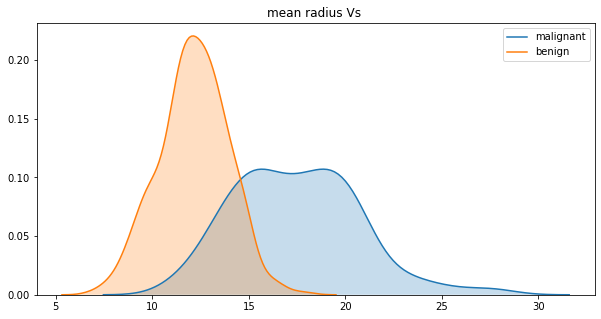

mean radiusis a good predictor.


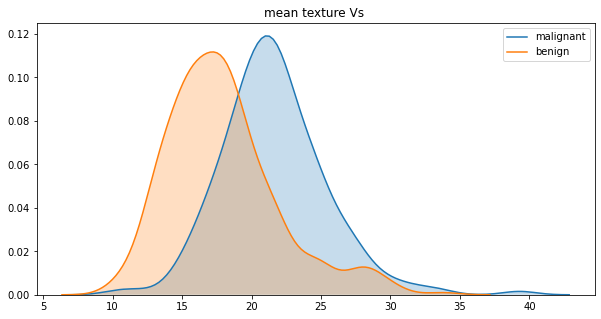

mean texture is a poor predictor.


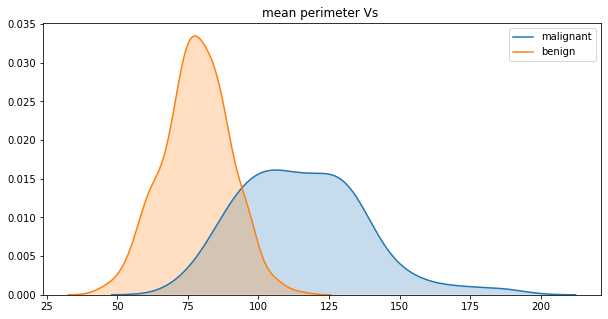

mean perimeteris a good predictor.


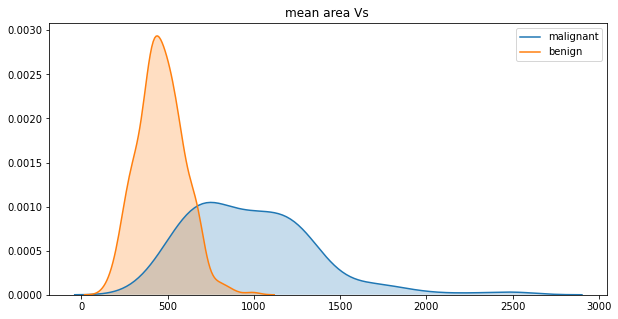

mean areais a good predictor.


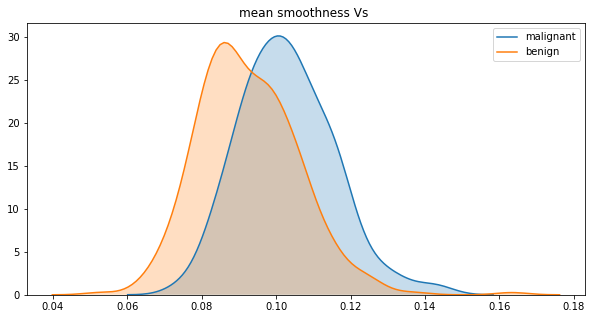

mean smoothness is a poor predictor.


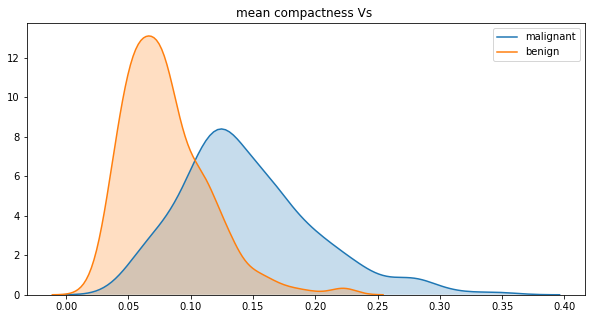

mean compactnessis a good predictor.


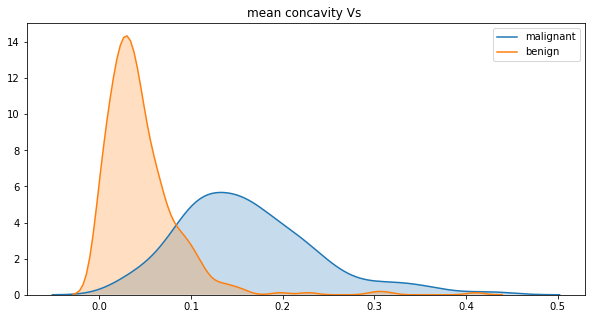

mean concavity is a poor predictor.


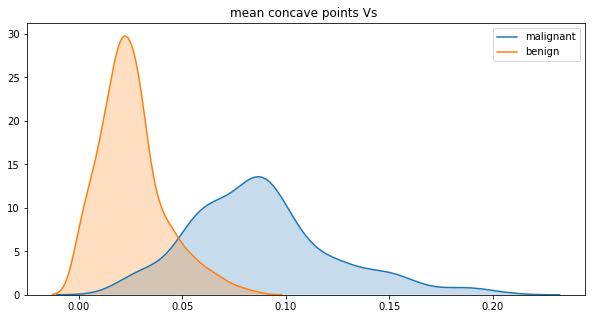

mean concave pointsis a good predictor.


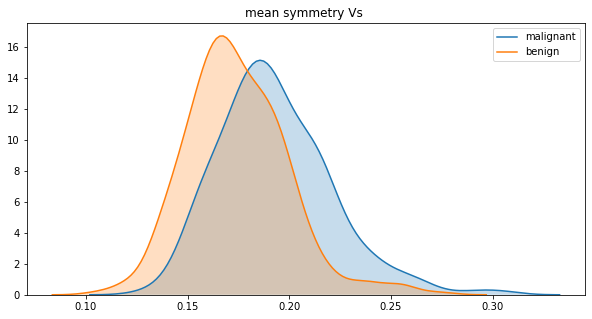

mean symmetry is a poor predictor.


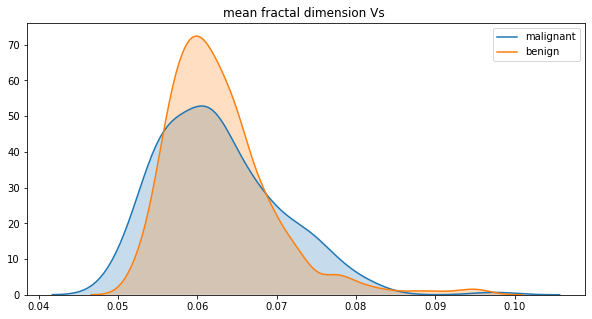

mean fractal dimension is a poor predictor.


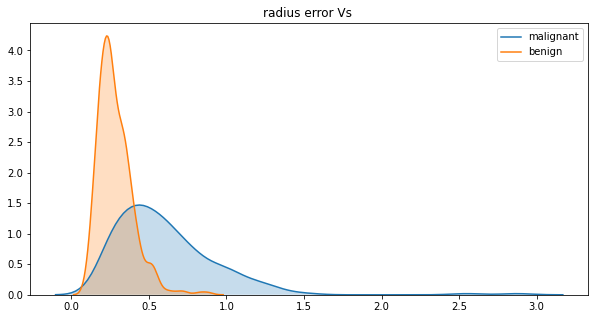

radius erroris a good predictor.


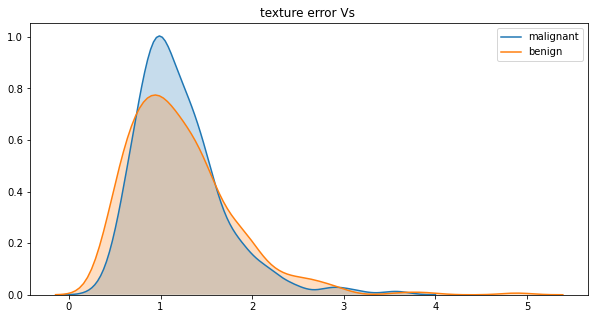

texture error is a Weak predictor.


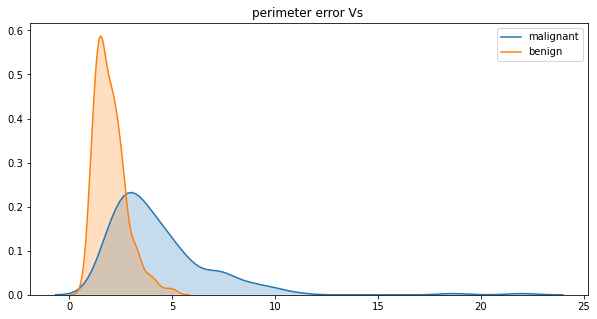

perimeter erroris a good predictor.


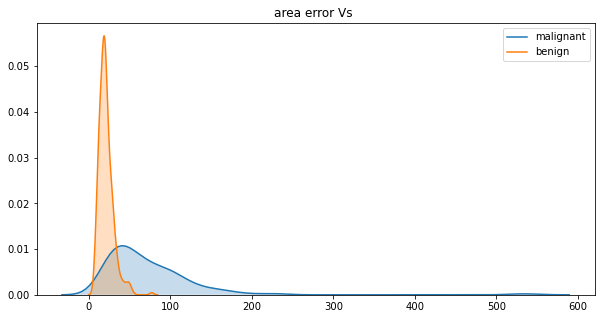

area erroris a good predictor.


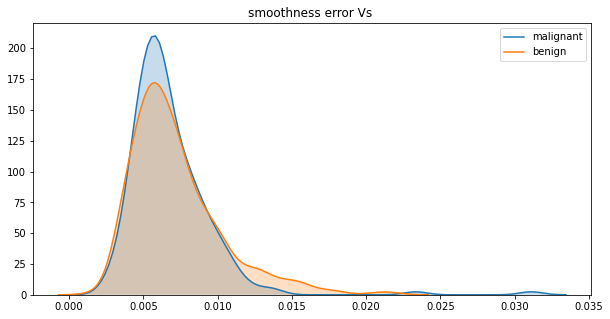

smoothness error is a Weak predictor.


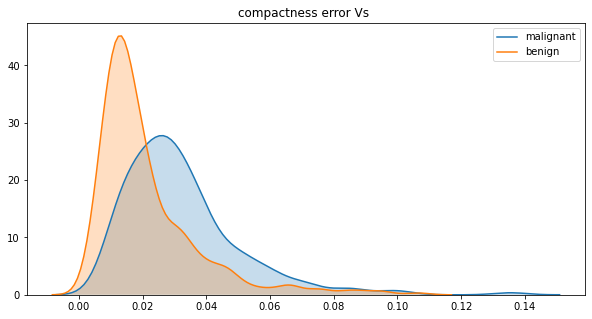

compactness error is a Weak predictor.


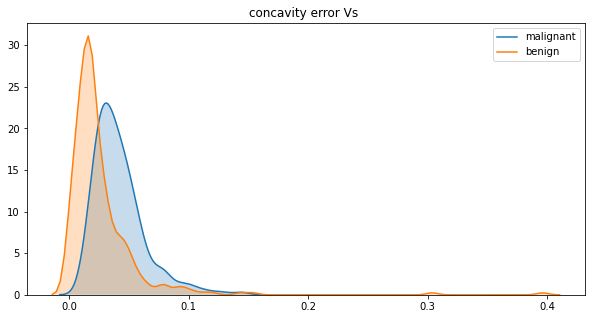

concavity erroris a good predictor.


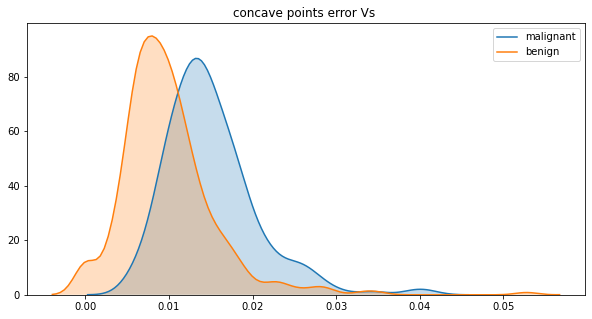

concave points error is a Weak predictor.


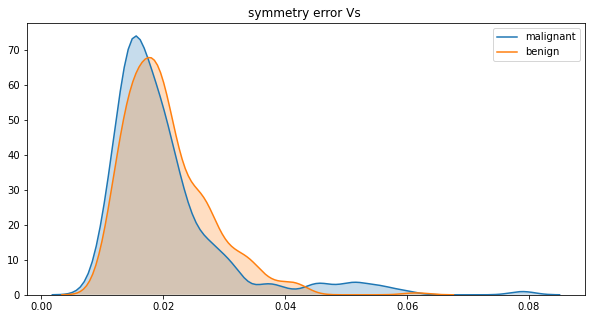

symmetry error is a Weak predictor.


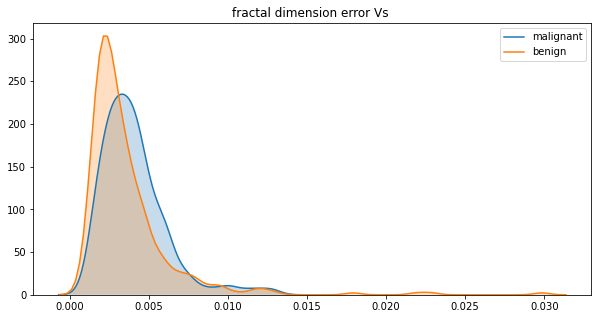

fractal dimension erroris a good predictor.


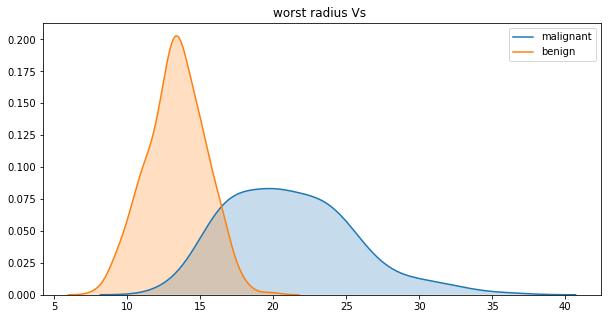

worst radiusis a good predictor.


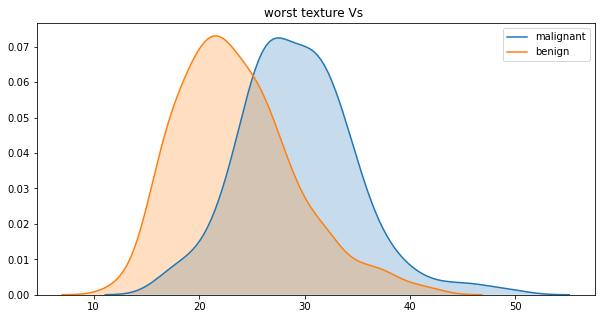

worst texture is a Weak predictor.


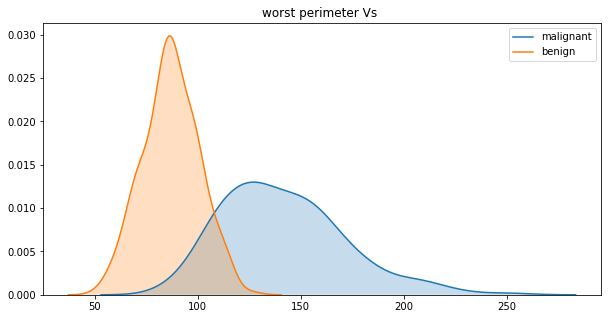

worst perimeteris a good predictor.


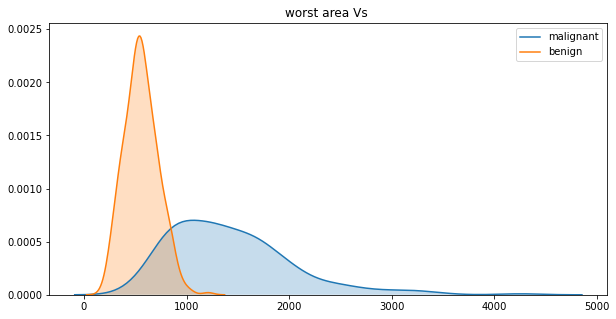

worst areais a good predictor.


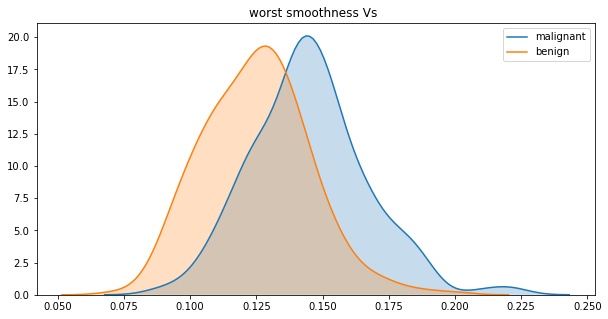

worst smoothness is a poor predictor.


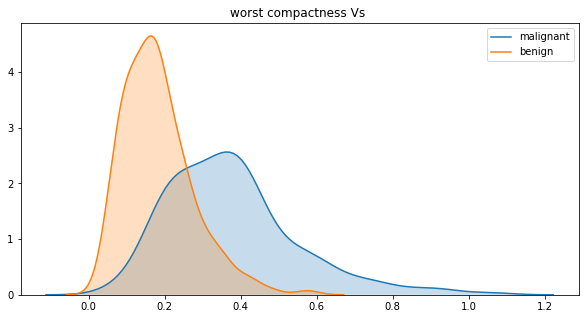

worst compactnessis a good predictor.


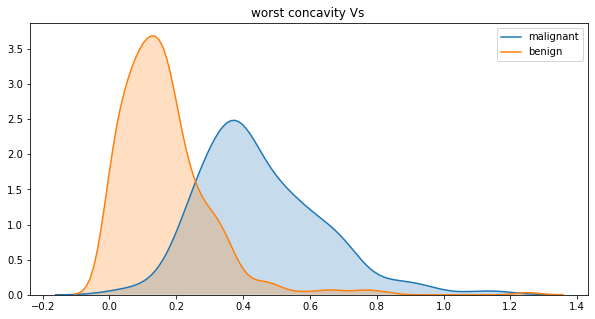

worst concavity is a poor predictor.


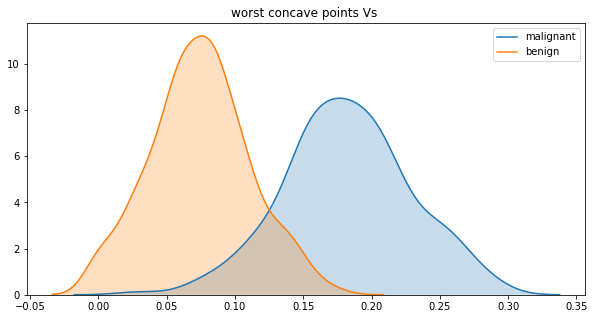

worst concave pointsis a good predictor.


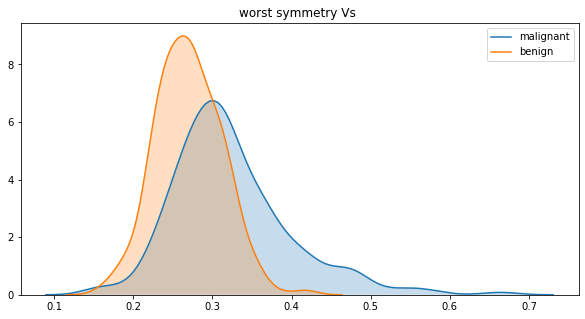

worst symmetryis a good predictor.


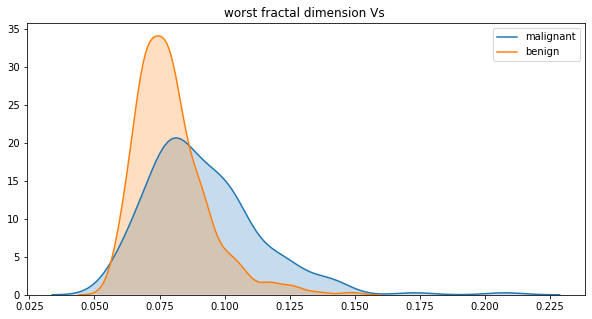

worst fractal dimension is a Weak predictor.


In [405]:
coll = dt_float + dt_int #data.columns[1:-1]
for i, col in enumerate(coll):
    plt.figure(figsize=(10,5))
    for i in list(data[tar_col].unique()):
        sns.kdeplot(data.loc[data[tar_col] == i, col], shade=True, label=i)
    plt.title(f"{col} Vs ")
    plt.show()    
    df = data[[tar_col,col]].groupby([tar_col]).agg({col:['min', 'max']})
    df.columns = df.columns.droplevel()
    
    flag = False
    for i in range(1,len(df.T.min().index)):
        max_val = df.T.max().sort_values()[i-1]
        min_val = df.T.min().sort_values()[i]
        if max_val <= min_val:
            flag = True
    if flag:
        print(f"{col} is a Very good predictor.")
    else:
        min_ = df.T.min().sort_values()[1] - df.T.min().sort_values()[0]
        pred_min = min_/(df.loc[df.T.min().idxmin()][1] - df.loc[df.T.min().idxmin()][0])

        max_ = df.T.max().sort_values(ascending=False)[0] - df.T.max().sort_values(ascending=False)[1]
        pred_max = max_ / (df.loc[df.T.max().idxmax()][1] - df.loc[df.T.max().idxmax()][0])

        if pred_min >= 0.4 or pred_max >= 0.4: 
            print(f"{col}is a good predictor.")
        elif 0.4 > pred_min > 0.2 or 0.4 > pred_max > 0.2: 
            print(f"{col} is a Weak predictor.")
        else :
            print(f"{col} is a poor predictor.")

In [407]:
# coll = dt_float + dt_int
# no_of_col = 2
# for col in dt_object[:]:
#     print(col)
# print(len(dt_float))    
print(coll)

['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']


In [425]:
from tqdm import tqdm, tqdm_notebook

lis = []
for i in tqdm_notebook(range(10000)):
    lis.append(i**i)

In [348]:
print(f"{BOLD}{GREEN}Top 15 Missing Columns{END}".center(25, " "))
# tqdm_notebook.pandas()
# print('{} is a good predictor.{:^110s}'.format(BOLD,Hello))
# from tqdm.auto import tqdm, trange
# from time import sleep

# bar = trange(10)
# for i in bar:
#     # Print using tqdm class method .write()
#     sleep(0.1)
#     if not (i % 3):
#         tqdm.write("Done task %i" % i)
#     # Can also use bar.write()

Top 15 Missing Columns


In [39]:
# from tabulate import tabulate

# pdtabulate=lambda df:tabulate(missing_value_df,headers=['Features','Count','Percentage'],tablefmt='psql',stralign='center')
# print(f'{BOLD}{GREEN}{pdtabulate(missing_value_df)}{END}')

In [57]:
# percent_missing = data.isnull().sum() * 100 / len(data)
# missing_value_df = pd.DataFrame({'Count': data.isnull().sum(),
#                                  'Percentage': percent_missing}).sort_values('Percentage',ascending=False)[:15]
# print(f'{BOLD}{GREEN}Top 10 Missing Columns')
# print(f'*'*22)
# print(f'{missing_value_df}{END}')

In [59]:
# import missingno as msno
# msno.bar(data);


In [3]:
# per = data[tar_col].nunique() / len(data[tar_col])
# per

0.00024

In [60]:
  
# if (data[tar_col].nunique() / len(data[tar_col])) <= 0.05 : 
#     if data[tar_col].dtypes == 'O':
#         print('It is a Classification Problem')
#     else:
#         print(f'It looks like a Classification Problem but Datatype is {BOLD}{RED}{data[tar_col].dtypes}{END} ,lemme change the Datatype to Object')
#         data[tar_col] = data[tar_col].astype('category')
# else:
#     print('Regression Problem') 

In [ ]:
data[tar_col].style.apply(che)

In [ ]:
data[tar_col].nunique()

In [45]:
PURPLE = '\033[31m'
CYAN = '\033[96m'
DARKCYAN = '\033[36m'
BLUE = '\033[94m'
GREEN = '\033[92m'
YELLOW = '\033[93m'
RED = '\033[91m'
BOLD = '\033[1m'
UNDERLINE = '\033[4m'
END = '\033[0m'

Magenta = '\033[95m'
Grey = '\033[90m'
Magenta_ = '\033[35m'

print(f'{BOLD}{GREEN}Hi Hello World{END}')

Hi Hello World


In [ ]:
data = pd.read_csv(fname)
data.head()

In [3]:
# cmap = plt.get_cmap('Spectral')
# colors = [cmap(i) for i in np.linspace(0.2, 1, 8)]

# plt.figure(figsize=(9,9))
# sns.set(font_scale=1.4)
# plt.pie(count,labels=count.index, autopct='%.2f%%', shadow=True,colors=colors)
# plt.title('Target Column Classes Distribution')
# plt.show()

Select below options

1.Univariate Analysis
2.Bivariate Analysis
3.Multivariate Analysis
4.Quit

2
Bivariate
Select below options

1.Scatter Plot
2.Density Plot

2
Total Features 4
No.of Features to Visualize

4


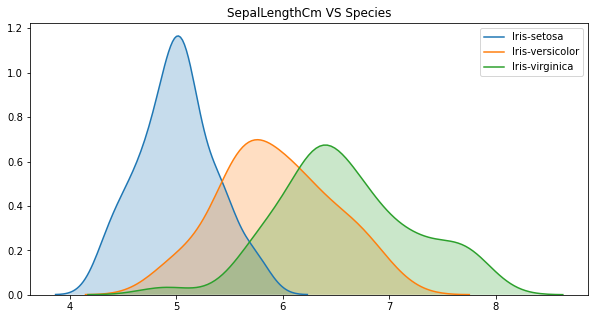

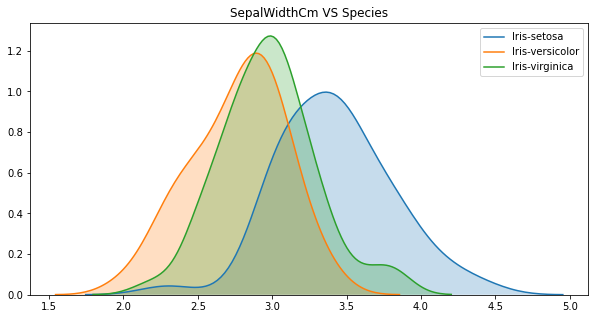

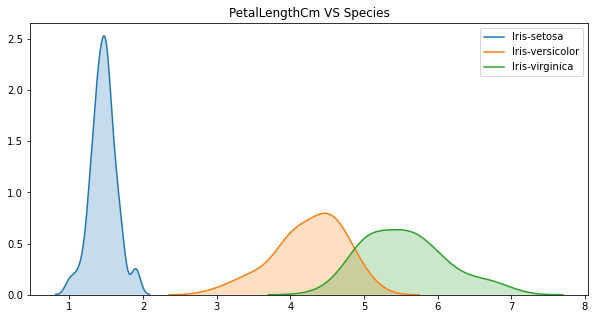

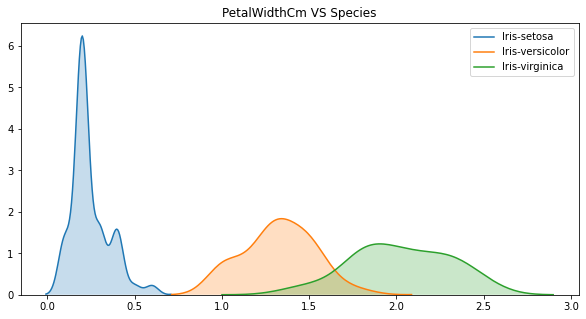

Select below options

1.Univariate Analysis
2.Bivariate Analysis
3.Multivariate Analysis
4.Quit

4


In [353]:
def multivariate():
    input_value1 = int(input('Select below options\n\n1.Correlation Matrix\n2.List of Correlated Features\n\n'))
    if input_value1 == 1:
        correlation_Matrix()
    elif input_value1 == 2:
        thresh = float(input('Enter the threshold '))
        correlation(data,thresh)
    else :
        print('ERROR : Please enter in range value')
        
def bivariate():
    input_value1 = int(input('Select below options\n\n1.Scatter Plot\n2.Density Plot\n\n'))
    if input_value1 == 1:
        no_of_Features(scatter_Plot)
    elif input_value1 == 2:
        no_of_Features(density_Plot)
    else :
        print('ERROR : Please enter in range value')

def univariate():
    input_value1 = int(input('Select below options\n\n1.Box Plot\n2.Histogram\n3.Distribution\n\n'))
    if input_value1 == 1:
        no_of_Features(box_Plot)
    elif input_value1 == 2:
        no_of_Features(histogram)
    elif input_value1 == 3:
        no_of_Features(distribution)
    else :
        print('ERROR : Please enter in range value')

def no_of_Features(func):
    print(f'Total Features {len(dt_float)}')
    No_of_Feat = int(input('No.of Features to Visualize\n\n'))
    if No_of_Feat <= len(dt_float) :
        func(no_of_col = No_of_Feat)
    else :
        print(f'ERROR : No.of columns should be <= {len(dt_float)}')

def correlation(dataset,threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (abs(corr_matrix.iloc[i, j]) >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
    print(col_corr)
    
def correlation_Matrix():
    plt.figure(figsize=(20,15))
    matrix = np.triu(data[dt_float + dt_int].corr())
    sns.heatmap(data[dt_float + dt_int].corr(),annot=True, fmt=".2f",cmap="YlGnBu",mask=matrix)
    plt.show()

def scatter_Plot(no_of_col = len(dt_float)):
    for col in dt_float[:no_of_col]:
        plt.figure(figsize=(10,5))
        sns.scatterplot(x=tar_col, y=col, data=data)
#         plt.title(f"{col} VS {tar_col}")
        plt.show()
        
        cor = data[col].corr(data[tar_col])
        print(f'Correlation between {col} and {tar_col} is {cor}\n')
        print('*'*85)
    

def density_Plot(no_of_col = len(dt_float)):
    for i, col in enumerate(dt_float[:no_of_col]):
        plt.figure(figsize=(10,5))
        for i in list(data[tar_col].unique()):
            sns.kdeplot(data.loc[data[tar_col] == i, col], shade=True, label=i)
        plt.title(f"{col} VS {tar_col}")
        plt.show() 
    
def outlier_Treatment(data,col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    outliers = data[(data[col] < lower_range) | (data[col] > upper_range)]
    print(f"Column '{col}' has {len(outliers)} outliers\n\n")

def skewness_(df,col):
    skewness = df[col].skew()
    if skewness > 0:
        print('Distribution is Right Skewed\n')
    elif skewness < 0:
        print('Distribution is Left Skewed\n')
    else:
        print('Normally Distributed\n')
        
def box_Plot(no_of_col = len(dt_float)):
    for col in dt_float[:no_of_col]:
        plt.figure(figsize=(10,5))
        sns.boxplot(x=data[col],color=(np.random.uniform(0, 1), np.random.uniform(0, 1), np.random.uniform(0, 1)));
        plt.show()
        
        skewness_(data,col)
        outlier_Treatment(data,col)
#         if len(outliers) != 0:
#             print(f"Index of outlier records : {list(outliers.index)}")
        print('*'*85,'\n')
    
def histogram(no_of_col = len(dt_float)):
    for col in dt_float[:no_of_col]:
        plt.figure(figsize=(10,5))
        sns.distplot(data[col],kde = False,hist_kws={"linewidth": 3,"alpha": 1}
                     ,color=(np.random.uniform(0, 1), np.random.uniform(0, 1), np.random.uniform(0, 1)));
        plt.show()
        skewness_(data,col)
#         outlier_Treatment(data,col)
        print('*'*85)        
        
        
def distribution(no_of_col = len(dt_float)):
    for col in dt_float[:no_of_col]:
        plt.figure(figsize=(10,5))
        sns.kdeplot(data[col], shade=True,color=(np.random.uniform(0, 1), np.random.uniform(0, 1), np.random.uniform(0, 1)));
#         sns.kdeplot(data[col], shade=True,color=np.random.rand(3,));
        plt.show()
        
        skewness_(data,col)
        outlier_Treatment(data,col)
        print('*'*85)
RED = '\033[42m'
flag = 1
while flag:
    try :
        input_value = int(input('Select below options\n\n1.Univariate Analysis\n2.Bivariate Analysis\n3.Multivariate Analysis\n4.Quit\n\n'))
        if input_value == 1:
            print('Univariate')
            univariate()
        elif input_value == 2:
            print('Bivariate')
            bivariate()
        elif input_value == 3:
            multivariate()
        elif input_value == 4 :
            break
        else:
            print('ERROR : Please enter in range value')
    except ValueError :
        print(f'{BOLD}{RED}ERROR{END}: only INTEGERS are acceptable')

In [ ]:
# sns.scatterplot(x="greatstone_rating", y="2012_return_category", data=data)
# data.columns

In [354]:
# iris = sns.load_dataset("iris")
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [357]:
df = data[['diagnosis',col]].groupby(['diagnosis'])agg({col:['min', 'max']})#.columns.droplevel()
df.columns = df.columns.droplevel()
# df.get_group('malignant')['worst symmetry'].value_counts(bins=6).sort_index()

SyntaxError: invalid syntax (<ipython-input-357-9b082f914699>, line 1)

In [319]:
data['worst symmetry'].max() - data['worst symmetry'].min()


0.5073

In [358]:
# df.T.min().idxmin()
flag = False
for i in range(1,len(df.T.min().index)):
    max_val = df.T.max().sort_values()[i-1]
    min_val = df.T.min().sort_values()[i]
    if max_val <= min_val:
        flag = True
if flag:
    print(f"sepal_width is a good predictor.")
else:
    min_ = df.T.min().sort_values()[1] - df.T.min().sort_values()[0]
    pred_min = min_/(df.loc[df.T.min().idxmin()][1] - df.loc[df.T.min().idxmin()][0])

    max_ = df.T.max().sort_values(ascending=False)[0] - df.T.max().sort_values(ascending=False)[1]
    pred_max = max_ / (df.loc[df.T.max().idxmax()][1] - df.loc[df.T.max().idxmax()][0])
    
    if pred_min <= 0.2 and pred_max <= 0.2: 
        print(f"sepal_width is a poor predictor.")
    elif 0.4 >= pred_min > 0.2 and 0.4 >= pred_max > 0.2: 
        print(f"sepal_width is a Weak predictor.")
    else :
        print(f"sepal_width is a good predictor.")
# df.T.max().sort_values()
# df.T.min().sort_values()[2]
# df.loc[df.T.min().idxmin()][1]

sepal_width is a good predictor.


In [422]:
df = data[[tar,col]].groupby([tar]).agg({col:['min', 'max']})#.columns.droplevel()
df.columns = df.columns.droplevel()
df.T

Species,Iris-setosa,Iris-versicolor,Iris-virginica
min,4.3,4.9,4.9
max,5.8,7.0,7.9


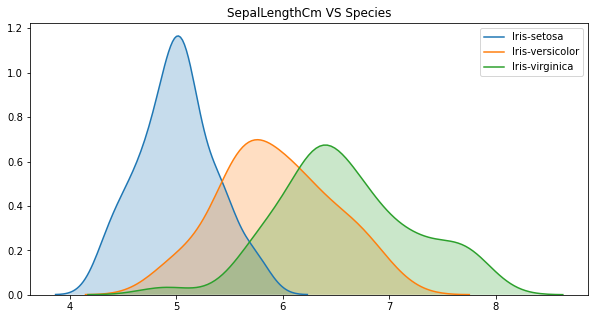

In [421]:
col = 'SepalLengthCm'
tar = 'Species'
plt.figure(figsize=(10,5))
for i in list(data[tar_col].unique()):
    sns.kdeplot(data.loc[data[tar_col] == i, col], shade=True, label=i)
plt.title(f"{col} VS {tar_col}")
plt.show() 

In [414]:
df.T.max().sort_values(ascending=False)[0] - df.T.max().sort_values(ascending=False)[1]

0.9000000000000004

In [415]:
# df.T.max().idxmin()
min_ = df.T.min().sort_values()[1] - df.T.min().sort_values()[0]
pred_min = min_/(df.loc[df.T.min().idxmin()][1] - df.loc[df.T.min().idxmin()][0])

max_ = df.T.max().sort_values(ascending=False)[0] - df.T.max().sort_values(ascending=False)[1]
pred_max = max_ / (df.loc[df.T.max().idxmax()][1] - df.loc[df.T.max().idxmax()][0])
print(f'min : {min_}\nmax : {max_}')
print(f'pred_min : {pred_min}\npred_max : {pred_max}')

min : 0.6000000000000005
max : 0.9000000000000004
pred_min : 0.40000000000000036
pred_max : 0.3000000000000001


In [423]:
# min_
0.6/1.5
# .6/(df.loc[df.T.min().idxmin()][1] - df.loc[df.T.min().idxmin()][0])

0.39999999999999997

In [386]:
# 0.7/1.1
df.T.max().sort_values(ascending=False)[0] - df.T.max().sort_values(ascending=False)[1]
# max_
# (df.loc[df.T.max().idxmax()][1] - df.loc[df.T.max().idxmax()][0])

0.7

In [271]:
if pred_min >= 0.4 and pred_max >= 0.4: 
    print(f"sepal_width is a good predictor.")
elif 0.4 > pred_min > 0.2 and 0.4 > pred_max > 0.2: 
    print(f"sepal_width is a Weak predictor.")
else :
    print(f"sepal_width is a good predictor.")

sepal_width is a good predictor.


In [81]:
df.T.min().idxmax()

'setosa'

In [98]:
val = df.T.max().sort_values(ascending=False)[0] - df.T.max().sort_values(ascending=False)[1]
print(val)
print((df.loc[df.T.max().idxmax()][1] - df.loc[df.T.max().idxmax()][0]))

0.6000000000000005
2.1000000000000005


In [255]:
val / (df.loc[df.T.max().idxmax()][1] - df.loc[df.T.max().idxmax()][0])

0.05827505827505827

In [ ]:
def correlation(dataset,threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (abs(corr_matrix.iloc[i, j]) >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
    print(f"Below {len(col_corr)} are highly correlated features\n\n",col_corr)
correlation(data,0.99)

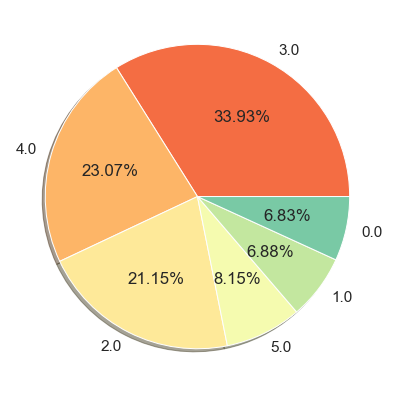

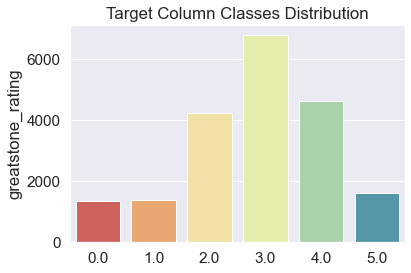

In [51]:
count = data[tar_col].value_counts(dropna=True)

cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0.2, 1, 8)]

plt.figure(figsize=(7,7))
sns.set(font_scale=1.4)

# fig, ax =plt.subplots(1,2)
plt.pie(count,labels=count.index, autopct='%.2f%%', shadow=True,colors=colors)
plt.show()
plt.title('Target Column Classes Distribution')
sns.barplot( x=count.index, y=count, data=data, palette='Spectral')
plt.show()

In [ ]:
# n = len(dt_float)
n = 5
for col in dt_float[:n]:
    print(col)
# print(n)

In [ ]:
def box_Plot(col):
# for col in dt_int:
    sns.boxplot(x=data[col])
    print('\n')
    sorted(data[col])
    Q1,Q3 = np.percentile(data[col] , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    print(IQR,lower_range,upper_range)
    outliers = data[(data[col] < lower_range) | (data[col] > upper_range)]
    print(f"Column '{col}' has {len(outliers)} outliers")
    if len(outliers) != 0:
        print(f"Index of outlier records : {list(outliers.index)}")

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(data['2014_category_return'],kde=False,hist_kws={"linewidth": 3,"alpha": 1}) 

# skewness = data['years_up'].skew()
# if skewness > 0:
#     print('Distribution is Right Skewed')
# elif skewness < 0:
#     print('Distribution is Left Skewed')
# else:
#     print('Normally Distributed')

# sns.kdeplot(data['years_up'], shade=True,color=(np.random.uniform(0, 1), np.random.uniform(0, 1), np.random.uniform(0, 1)));


In [ ]:
data['2014_category_return']

In [ ]:
import numpy as np
box_Plot('years_up')

In [ ]:
import pandas as pd
d = pd.DataFrame({'A':[1,2,5,19,1,5,3],'B':[10,10,10,1000,1,5,3],'C':[1,0,1,0,1,5,3]})

In [ ]:
d.info()

In [ ]:
import seaborn as sns
# plt.figure(figsize=(8,5))
# sns.boxplot(x=data['ytd_return_category'])

# fig = px.box(data, y="ytd_return_category")
# fig.show()

In [ ]:
def outlier_treatment(df,col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    print(lower_range,upper_range)
    outliers = df[col][(df[col] < lower_range) | (df[col] > upper_range)]
    print(f"Column {col} has {len(outliers)} outliers")
#     print(f"Index of outlier records : {list(outliers.index)}")

In [ ]:
outlier_treatment(data,'2014_category_return')

In [ ]:
# import sys

# import numpy as np
# import pandas as pd

# import plotly.express as px

# import seaborn as sns
# import matplotlib.pyplot as plt
# %matplotlib inline

# from tkinter import *
# from tkinter.filedialog import askopenfilename   

# fname = []
# # global dt_int,dt_float,dt_object
# dt_int = dt_float = dt_object = []

# def data_Imbalance(lst,tar_col):
#     if len(set(lst)) != 1:
#         print(f"Target Column '{tar_col}' has Imbalanced Data\n")
#         print("NOTE:Refer following link to handle Imbalanced Data https://imbalanced-learn.readthedocs.io/en/stable/over_sampling.html")

# def tar_Viz(tar_col):
#     count = data[tar_col].value_counts()
    
#     fig = px.pie(values=count, names=count.index, title='Target Column Classes Distribution')
#     fig.update_traces(textposition='inside', textinfo='percent+label')
#     fig.show()

#     fig = px.bar(data, x=count.index, y=count)
#     fig.update_traces(textposition='inside')
#     fig.show()
    
# #     cmap = plt.get_cmap('Spectral')
# #     colors = [cmap(i) for i in np.linspace(0.2, 1, 8)]

# #     plt.figure(figsize=(9,9))
# #     sns.set(font_scale=1.4)
# #     plt.pie(count,labels=count.index, autopct='%.2f%%', shadow=True,colors=colors)
# #     plt.title('Target Column Classes Distribution')
# #     plt.show()
    
#     tar_val =list(data[tar_col].value_counts().values)
#     data_Imbalance(tar_val,tar_col)
    
# def df_Info(data):
#     print('Your Dataset has following shape')
#     print('*'*32)
#     print(f'Rows : {data.shape[0]}\nColumns : {data.shape[1]}\n')
    
# def df_Dtypes(data):
    
#     global dt_int,dt_float,dt_object
# #     dt_int = dt_float = dt_object = []
#     g = data.columns.to_series().groupby(data.dtypes).groups
#     print('Your Dataset contains following DataTypes')
#     print('*'*41)
#     for k, v in g.items():
#         print(f"{k.name} : {len(v)}")
        
#     for k, v in g.items():
# #     print(f"{k.name} : {(v)}")
#         if k.name == 'int64':
#             dt_int = list(v)

#         elif k.name == 'float64':
#             dt_float = list(v)

#         elif k.name == 'object':
#             dt_object = list(v)

# def no_of_Features(func):
#     print(f'Total Features {len(dt_float)}')
#     No_of_Feat = int(input('No.of Features to Visualize\n\n'))
#     if No_of_Feat <= len(dt_float) :
#         func(no_of_col = No_of_Feat)
#     else :
#         print(f'ERROR : No.of columns should be <= {len(dt_float)}')

# def correlation(dataset,threshold):
#     col_corr = set() # Set of all the names of deleted columns
#     corr_matrix = dataset.corr()
#     for i in range(len(corr_matrix.columns)):
#         for j in range(i):
#             if (abs(corr_matrix.iloc[i, j]) >= threshold) and (corr_matrix.columns[j] not in col_corr):
#                 colname = corr_matrix.columns[i] # getting the name of column
#                 col_corr.add(colname)
#     print(f"\nBelow {len(col_corr)} are/is highly correlated features\n\n",col_corr)
    
# def correlation_Matrix():
#     plt.figure(figsize=(20,15))
#     matrix = np.triu(data[dt_float + dt_int].corr())
#     sns.heatmap(data[dt_float + dt_int].corr(),annot=True, fmt=".2f",cmap="YlGnBu",mask=matrix)
#     plt.show()

# def scatter_Plot(no_of_col = len(dt_float)):
#     for col in dt_float[:no_of_col]:
#         plt.figure(figsize=(10,5))
#         sns.scatterplot(x=tar_col, y=col, data=data)
# #         plt.title(f"{col} VS {tar_col}")
#         plt.show()
        
#         cor = data[col].corr(data[tar_col])
#         print(f'Correlation between {col} and {tar_col} is {cor}\n')
#         print('*'*85)
    

# def density_Plot(no_of_col = len(dt_float)):
#     for i, col in enumerate(dt_float[:no_of_col]):
#         plt.figure(figsize=(10,5))
#         for i in list(data[tar_col].unique()):
#             sns.kdeplot(data.loc[data[tar_col] == i, col], shade=True, label=i)
#         plt.title(f"{col} VS {tar_col}")
#         plt.show() 
    
# def outlier_Treatment(data,col):
#     Q1 = data[col].quantile(0.25)
#     Q3 = data[col].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_range = Q1 - (1.5 * IQR)
#     upper_range = Q3 + (1.5 * IQR)
#     outliers = data[(data[col] < lower_range) | (data[col] > upper_range)]
#     print(f"Column '{col}' has {len(outliers)} outliers\n\n")

# def skewness_(df,col):
#     skewness = df[col].skew()
#     if skewness > 0:
#         print('Distribution is Right Skewed\n')
#     elif skewness < 0:
#         print('Distribution is Left Skewed\n')
#     else:
#         print('Normally Distributed\n')
        
# def box_Plot(no_of_col = len(dt_float)):
#     for col in dt_float[:no_of_col]:
#         plt.figure(figsize=(10,5))
#         sns.boxplot(x=data[col],color=(np.random.uniform(0, 1), np.random.uniform(0, 1), np.random.uniform(0, 1)));
#         plt.show()
        
#         skewness_(data,col)
#         outlier_Treatment(data,col)
# #         if len(outliers) != 0:
# #             print(f"Index of outlier records : {list(outliers.index)}")
#         print('*'*85,'\n')
    
# def histogram(no_of_col = len(dt_float)):
#     for col in dt_float[:no_of_col]:
#         plt.figure(figsize=(10,5))
#         sns.distplot(data[col],kde = False,hist_kws={"linewidth": 3,"alpha": 1}
#                      ,color=(np.random.uniform(0, 1), np.random.uniform(0, 1), np.random.uniform(0, 1)));
#         plt.show()
#         skewness_(data,col)
# #         outlier_Treatment(data,col)
#         print('*'*85)        
        
        
# def distribution(no_of_col = len(dt_float)):
#     for col in dt_float[:no_of_col]:
#         plt.figure(figsize=(10,5))
#         sns.kdeplot(data[col], shade=True,color=(np.random.uniform(0, 1), np.random.uniform(0, 1), np.random.uniform(0, 1)));
# #         sns.kdeplot(data[col], shade=True,color=np.random.rand(3,));
#         plt.show()
        
#         skewness_(data,col)
# #         outlier_Treatment(data,col)
#         print('*'*85)            
            
# def openFile():
#     global fname
#     fname = askopenfilename()
#     root.destroy()

# if __name__ == '__main__':

#     root = Tk()
#     Button(root, text='File Open', command = openFile).pack(fill=X)
#     mainloop()

#     if fname == []:
#         print("No FIle has selected")
#     else:
#         file_path = fname.rsplit('/',maxsplit=1)
#         df = file_path[1]
#         print(f"File Name : {df}")
#         print(f"File Directory : {file_path[0]}\n")
#         try:
#             data = pd.read_csv(fname)
#             df_Info(data)
#             df_Dtypes(data)
#             try :
#                 tar_col = input('Please Specify the Target Column\n\n')
#                 tar_Viz(tar_col)
#                 while True:    
#                     try :
#                         input_value = int(input('Select below options\n\n1.Univariate Analysis\n2.Bivariate Analysis\n3.Multivariate Analysis\n4.Quit\n\n'))
#                         if input_value == 1:
#                             input_value1 = int(input('Select below options\n\n1.Box Plot\n2.Histogram\n3.Distribution\n\n'))
#                             if input_value1 == 1:
#                                 no_of_Features(box_Plot)
#                             elif input_value1 == 2:
#                                 no_of_Features(histogram)
#                             elif input_value1 == 3:
#                                 no_of_Features(distribution)
#                             else :
#                                 print('ERROR : Please enter in range value')

#                         elif input_value == 2:
#                             input_value1 = int(input('Select below options\n\n1.Scatter Plot\n2.Density Plot\n\n'))
#                             if input_value1 == 1:
#                                 no_of_Features(scatter_Plot)
#                             elif input_value1 == 2:
#                                 no_of_Features(density_Plot)
#                             else :
#                                 print('ERROR : Please enter in range value')
#                         elif input_value == 3:
#                             input_value1 = int(input('Select below options\n\n1.Correlation Matrix\n2.List of Correlated Features\n\n'))
#                             if input_value1 == 1:
#                                 correlation_Matrix()
#                             elif input_value1 == 2:
#                                 thresh = float(input('Enter the threshold '))
#                                 correlation(data,thresh)
#                             else :
#                                 print('ERROR : Please enter in range value')
#                         elif input_value == 4 :
#                             print('\nThank You, Bye.\n')
#                             break
#                         else:
#                             print('ERROR : Please enter in range value')
#                     except ValueError :
#                         print('ERROR : only INTEGERS are acceptable')
#             except KeyError:
#                 print('ERROR : Either you passed the WRONG column (or) other than a STRING ')
#         except Exception as e:
#                 print('ERROR : File Format is not supported',e)